<div class="alert alert-info">
    <h1><strong>BitCamp Hackathon:</strong> Quantum Track </h1>
    <h2><strong> Challenge 2 -</strong> QKD</h2>
</div>

Quantum Key Distribution aims to share a private key between two communicating parties (Alice and Bob) securely. 

In the second workshop we looked at the **BB84 protocol** for QKD. In this notebook, we will explore one of the alternative protocols - the B92 protocol!

# Introduction to the B92 protocol

The B92 protocol was proposed by Charles Bennett in 1992. Bennett is also one of the "B's" in BB84! The B92 protocol can be thought of as a simplified version of BB84. To understand B92, let's do a quick review of BB84 first.

## Review of BB84 protocol

The goal of the BB84 protocol is to create and securely share a key, which is just a series of 0s and 1s, between the sender (Alice) and the receiver (Bob). The BB84 protocol achieves this in 3 phases:

### Phase 1 - Sending
Alice radomly generates a *bitstring* and a list of *bases*. Some of the bits of the bitstring will make it onto the key. The *bases* can be either X or Z, selected randomly. Next, Alice **encodes** each bit of the bistring into a qubit using the corresponding basis in the list of bases, using the following decision scheme: 

| bit in bitstring | basis | State Alice encodes |
|:----------------:|:--------------------------:|:---------------:|
| 0 | Z | $$|0\rangle$$ |
| 1 | Z | $$|1\rangle$$ |
| 0 | X | $$|+\rangle$$ |
| 1 | X | $$|-\rangle$$ |

Alice sends each of these encoded qubits to Bob. So, Alice can send Bob one of **four** possible states - $|0\rangle, |1\rangle, |+\rangle$, and $|-\rangle$.


### Phase 2 - Receiving
Bob receives this qubit, and needs to measure them to find out their state. Bob generates a random list of bases, either X or Z, and measures each of the qubits he receives in the corresponding basis to generate his own bitstring. If Bob measures the qubit in the same basis that Alice had encoded it in, he will get the same bit as a result of that measurement as Alice had encoded. If Bob measures the qubit in a different basis, he is not guaranteed to get the same bit as Alice. 

### Phase 3 - Comparing
Therefore, after Bob has measured all qubits that Alice sent him, Alice and Bob publically declare their list of bases, and drop the bits from their respective bitstrings for which their **bases do not match**. The remaining bits, for which their bases match, are **guaranteed to match** as long as no one was eavesdropping when Alice sent Bob her qubits. Therefore, to find out if someone was eavesdropping, Alice and Bob can compare the first few bits of their respective keys and see if they match.

The figure below summarizes the BB84 protocol:

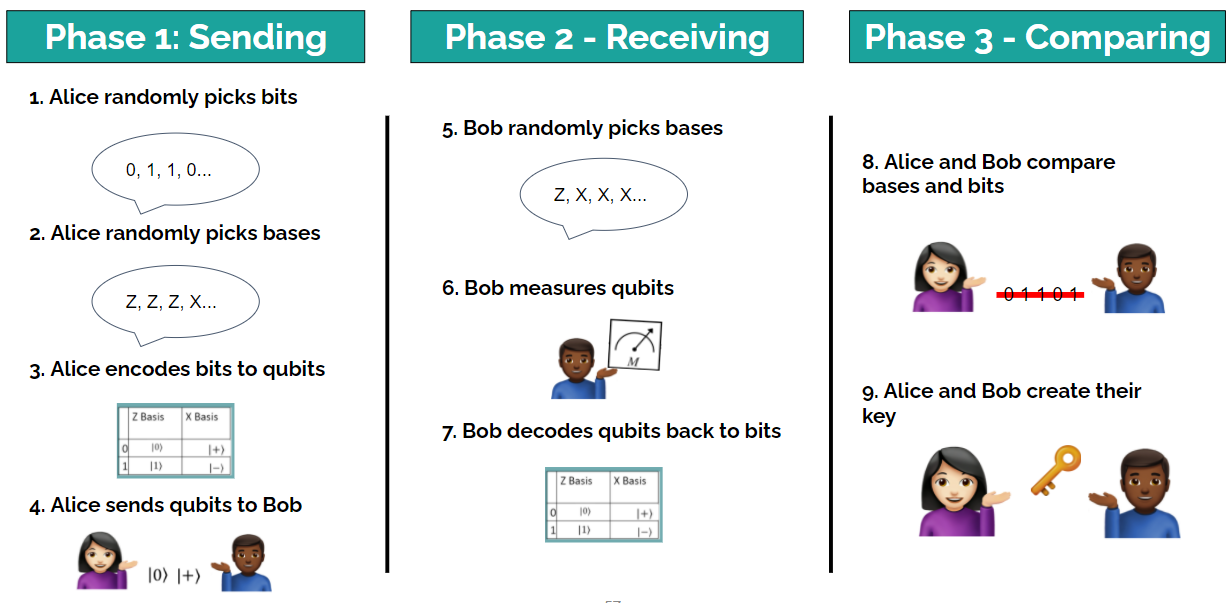

## The B92 protocol

The B92 protocol is similar in many ways to BB84. The biggest difference between the two protocols is that instead of there being four possible states that Alice can send Bob, there are only two possible states that Alice sends Bob - $|0\rangle$ or $|+\rangle$. The protocol still occurs in three phases, as decribed below:

### Phase 1 - Sending

#### Step 1 - Alice generates random bits

In this step, Alice generates a random list of bits (0s and 1s) - we'll call it **alice_bases**. Some of the bits in this list will eventually make it to Alice and Bob's shared key.

#### Step 2 - Alice encodes bits to qubits

In this step, Alice encodes the bits in alice_bases into qubits. If the bit in alice_bases is 0, Alice generates a qubit in the $|0\rangle$ state. If the bit is 1, Alice generates a qubit in the $|+\rangle$ state. This is summarized in the table below:

| bit in alice_bases | State Alice encodes |
|:----------------:|:--------------------------:|
| 0 | $$|0\rangle$$ |
| 1 | $$|+\rangle$$ |

#### Step 3 - Alice sends her qubits to Bob

In this step, Alice sends her qubits to Bob, similar to what she would have done in the BB84 protocol.

### Phase 2 - Receiving

#### Step 4 - Bob generates random bits

Now that Bob has received Alice's qubits, Bob wants to measure them. To do this, Bob generates a list of random bits (we'll call it **bob_bases**). Some of the bits of this list will eventually make it to the shared key. If the bit in **bob_bases** is 0, the qubit gets measured in the Z basis. If the bit is 1, the qubit gets measured in the X basis. This is summarized in the table below:

| bit in bob_bases | Measurement Basis |
|:----------------:|:--------------------------:|
| 0 | Z |
| 1 | X |

#### Step 5 - Bob makes measurements

In this step, Bob measures each of the qubits Alice sent using the correspoding basis (from bob_bases, using the table above).

#### Step 6 - Bob decodes qubits back to bits

In this step, Bob decodes the results of his measurements back to bits, by using the following table (this table is identical to the table that Bob would use in BB84):

| Result of Bob's measurement | Measurement basis | Classical bit Bob decodes |
|:----------------:|:--------------------------:|:---------------:|
| $$|0\rangle$$ | Z | 0 |
| $$|1\rangle$$ | Z | 1 |
| $$|+\rangle$$ | X | 0 |
| $$|-\rangle$$ | X | 1 |

Through this process, Bob generates a list of bits, which we will call **bob_bitstring**. 

### Phase 3 - Comparing

#### Step 7 - Bob shares his measured bitstring with Alice

In this step, Bob sends Alice his measured bitstring (**bob_bitstring**). B92 differs from BB84 here - in BB84 Bob and Alice shared their list of bases, whereas here Bob shares his measured bitstring with Alice. The reason this works is as follows: **bob_bitstring** consists of 0s and 1s. Let's think about when a bit in **bob_bitstring** is 0, and when it is 1:

1. **bit in bob_bitstring is 0**: 
    * This happens with 100% probability when Bob receives $|0\rangle$ from Alice and measures it in the Z basis (i.e., the corresponding bit in bob_bases is 0)
    * This happens with 100% probability when Bob receives the state $|+\rangle$ from Alice and in the X basis (i.e., the corresponding bit in bob_bases is 1). 
    * This happens with 50% probability when Bob receives $|0\rangle$ from Alice and measures it in the X basis,
    * This happens with 50% probability when Bob receives the state $|+\rangle$ from Alice and in the Z basis.
2. **bit in bob_bitstring is 1**: 
    * This happens with 50% prbability when Bob receives the state $|0\rangle$ from Alice and measures it in the X basis
    * This happens with 50% prbability when Bob receives the state $|+\rangle$ from Alice and measures it in the Z basis.

All these possibilities are summarized in the table below:

| bit in alice_bases | State Alice sends | bit in bob_bases | basis Bob measures in | Possible result and probability | bit Bob decodes (i.e. bit in bob_bitstring) | Do the bits in alice_bases and bob_bases match? |
|:----------------:|:--------------------------:|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|
| 0 |$$|0\rangle$$ | 0 | Z | $$|0\rangle$$ with 100% probability | 0 | Yes |
| 1 |$$|+\rangle$$ | 0 | Z | $$|0\rangle$$ with 50% probability | 0 | No |
| 1 |$$|+\rangle$$ | 0 | Z | $$|1\rangle$$ with 50% probability | 1 | No |
| 0 |$$|0\rangle$$ | 1 | X | $$|+\rangle$$ with 50% probability | 0 | Yes |
| 0 |$$|0\rangle$$ | 1 | X | $$|-\rangle$$ with 50% probability | 1 | No |
| 1 |$$|+\rangle$$ | 1 | X | $$|+\rangle$$ with 100% probability | 0 | Yes |

In the above table, notice that if the bit Bob decodes (i.e. the bit in **bob_bitstring**) is 1, the corresponding bits in alice_bases and bob_bases **do not match**. This cannot be said when the bit in bob_bitstring is 0 - this can happen both when the corresponding bits in alice_bases and bob_bases match or do not match. This is a really important insight, so we encourage you to carefully look at the table above to convince yourself that this is true. Bob can only decode a 1 after measuring the qubit Alice sent if the corresponding bit in bob_bases is opposite of the corresponding bit in alice_bases. On the other hand, Bob can decode a 0 after measuring the qubit Alice sent him both if the bit in bob_bases is the same as the bit in alice_bases (with 100% probability), or if the two bits are different (with 50% probability). 

#### Step 8 - Alice and Bob generate their key

In other words, **when Alice and Bob look at bob_bitstring, they can be 100% sure that whenever a bit in bob_bitstring is 1, the corresponding bits in alice_bases and bob_bases do not match.** This insight is the basis for key generation in B92 - Alice and Bob know that if they just keep the bits from their list of bases where the bits in bob_bitstring are 1, their remaining bits will be exactly opposite of each other - when Alice has a 1, Bob has a 0, and vice-versa. So, Alice can just flip her remaining bits (change 0 to 1 and 1 to 0), and Alice and Bob will have two matching strings of 0s and 1s that they can use as their key!

The B92 protocol is summarized in the diagram below:

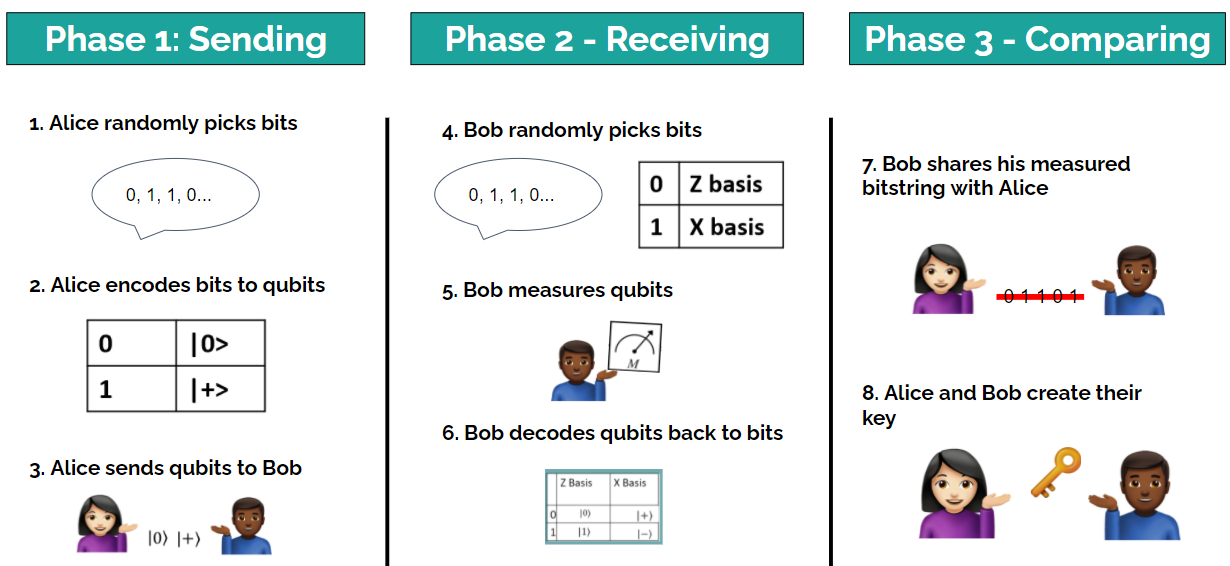

Now that we understand the protocol, let's code each of the steps!

As usual, we begin by importing all the libraries we will use:

In [3]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from copy import deepcopy

from random import getrandbits

print("Libraries imported successfully!")

Libraries imported successfully!


## Coding cheat sheet:
### Defining a quantum circuit: 
```python
qc = QuantumCircuit(1,1) # Define a 1 qubit, 1 classical bit quantum circuit

qc.x(0) #Add an X gate
qc.h(0) #Add an H gate
qc.z(0) #Add a Z gate
qc.y(0) #Add a Y gate

qc.draw() #Draw the circuit
```

### Using the qasm simulator:
First we have to add measurement gates:

``` python
qc.measure_all() #adds measurements
```
Next
``` python
qsim = Aer.get_backend('qasm_simulator') # Change statevector to qasm
job = execute(qc, backend=qsim, shots=1000) # add shots - tell it how many times to run, more shots = lower noise
result = job.result()
```

Lastly, we can visualise the output in histogram form:
``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

### Using a real quantum computer:

First we need to find the least busy backend:
```python
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
```

Next we can send the job to be run"
``` python
job = execute(qc, backend=backend, shots=100)
result = job.result()
```

Lastly, we can again plot the results in the same way:

``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

<a id="step1"></a>
## Phase 1 - Sending 
### Step 1 - Alice randomly generates bits

In this step, Alice randomly generates a list of 500 bits. We will call this list of bits `alice_bases`.
We will use the `getrandbits` function to randomly generate bits.

In [4]:
# BLOCK 1 - Use getrandbits to generate Alice's list of N = 500 random bits. If the randomly generated bit is 0, the basis is Z, and if it is 1, the basis is X
N = 500
## ADD CODE HERE

<a id="step3"></a>
### Step 2 - Alice encodes the classical bits into qubits


The table below summarizes the qubit states Alice sends, based on the bit in `alice_bases`:

| Bit in `alice_bases` | Qubit state sent |
|:--------------------------:|:---------------:|
| 0 |$$|0\rangle$$ |
| 1 |$$|+\rangle$$ |

We will store the encoded qubits as a list of quantum circuits in a list called `encoded_qubits`

In [5]:
#BLOCK 2 - Encode Alice's qubits using the table given above

encoded_qubits = []
## ADD CODE HERE

## Step 3 - Alice sends qubits to Bob

### There's nothing we need to code here. Alice would send the qubits to Bob (maybe through a fiber optic cable)

## Phase 1 - Receiving 

### Step 4 - Bob randomly generates bits to measure Alice's qubits

In this step, Bob randomly generates a list of bits. We will call this list `bob_bases`. If a bit in this list is 0, Bob measures in the Z basis. If it is 1, Bob measures in the X basis. This is summarized in the table below:

| bit in bob_bases | Measurement Basis |
|:----------------:|:--------------------------:|
| 0 | Z |
| 1 | X |


In [6]:
#BLOCK 3  - Bob generates a list of random bits called bob_bases. 
bob_bases = np.array([np.random.randint(2) for _ in range(N)])
# ADD CODE HERE

### Step 5 & 6 - Bob makes measurements and converts qubits into bits

Bob now has to measure the qubits in a the random bases that he chose in the previous step and generates his list of decoded bits called `bob_bitstring`

In [7]:
#BLOCK 4 - Measure Alice's qubits in the randomly selected bases

# Stores the results of Bob's measurements
bob_bitstring= []
    
for i in range(N):
    qc = deepcopy(encoded_qubits[i]) # Extracting each of the encoded qubits from the list of qubits Alice had sent. 
    # Deepcopy prevents multiple executions of this block from adding multiple measurements

    if bob_bases[i] == 0:
        #ADD CODE TO MEASURE qc IN Z BASIS
        qc.measure_all()

    elif bob_bases[i] == 1: #ADD CONDITIONAL FOR THE CASE THAT bob_basis[i] is 1
        #ADD CODE TO MEASURE qc IN X BASIS
        qc.h(0)
        qc.measure_all()
            
    # Now that the measurements have been added to the circuit, let's run them.
    job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 1) 
    results = job.result()
    counts = results.get_counts()
    measured_bit = max(counts, key=counts.get)

    # Append measured bit to Bob's measured bitstring
    bob_bitstring.append(int(measured_bit))

# Print bob's bitstring

## Phase 3 - Comparing
### Step 7 - Bob shares his measured bits with Alice

Alice and Bob publicly analyze Bob's bits that he measured in the previous step (`bob_bitstring`). They find which qubits Bob measured to be 1, which can only happen if the corresponding bits in `alice_bases` and `bob_bases` are opposite. You can visualize this from the table below:

| bit in alice_bases | State Alice sends | bit in bob_bases | basis Bob measures in | Possible result and probability | bit Bob decodes (i.e. bit in bob_bitstring) | Do the bits in alice_bases and bob_bases match? |
|:----------------:|:--------------------------:|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|
| 0 |$$|0\rangle$$ | 0 | Z | $$|0\rangle$$ with 100% probability | 0 | Yes |
| 1 |$$|+\rangle$$ | 0 | Z | $$|0\rangle$$ with 50% probability | 0 | No |
| 1 |$$|+\rangle$$ | 0 | Z | $$|1\rangle$$ with 50% probability | 1 | No |
| 0 |$$|0\rangle$$ | 1 | X | $$|+\rangle$$ with 50% probability | 0 | Yes |
| 0 |$$|0\rangle$$ | 1 | X | $$|-\rangle$$ with 50% probability | 1 | No |
| 1 |$$|+\rangle$$ | 1 | X | $$|+\rangle$$ with 100% probability | 0 | Yes |

In the block below, create a list called `bob_one_indices` that will store the locations of all the bits in `bob_bitstring` that are 1.
Try printing the length of `bob_one_indices`. What would you expect it to be approximately, given that Alice sent Bob 500 qubits?

In [8]:
#BLOCK 5 - Alice and Bob analyze bob_bitstring and save the indices where bob_bitstring is 1
# ADD CODE HERE

len(bob_one_indices) # Checking the length of bob_one_indices

115

We would expect about half the time, the bits in `bob_bases` and `alice_bases` will match, since they're both randomly choosing between 0 and 1. The other half of the bits in `bob_bases` and `alice_bases` do not match. Of these times, about half the time Bob will measure a 0 (refer the table above to verify this) and half the time Bob will measure a 1. Therefore, we would expect about 1/4th of the bits in `bob_bitstring` to be 1, i.e., we'd expect to get about 125 1's in `bob_bitstring`. Is that the approximate length of `bob_one_indices` that you got?

### Step 8 - Alice and Bob generate their key

Final step! Alice and Bob generate their key by dropping all the bases where Bob measured a 0 and only keeping the bases for which Bob meausured a 1. Alice inverts the bits in `alice_bases` that she keeps.

In the coding blocks below, generate Alice's key (`alice_key`) by appending the inverse of the bits from `alice_bases` corresponding to the indices in `bob_one_indices`. Similarly generate Bob's key (`bob_key`) by appending the bits from `bob_bases` corresponding to the indices in `bob_one_indices`.

In [9]:
#BLOCK 6 - create Alice's key
# ADD CODE HERE
print(alice_key)

[0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0]


In [10]:
#BLOCK 7 - create Bob's key
# ADD CODE HERE
print(bob_key)

[0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0]


Let's check if Alice and Bob's keys match!

In [11]:
#BLOCK 8 - Check if these keys are the same
# ADD CODE HERE

True

That's the protocol! Alice and Bob now have a identical private keys that they can use to securely communicate!

## Encryping and decrypting messages using the key

Once the key is generated, Alice and Bob can use it to send and receive messages! In the block below, we have created two helper functions `encrypt_message` and `decrypt_message` to encrypt and decrypt the message. `encrypt_message` takes the unencrypted message along with the key to encode the message, while `decrypt_message` takes the encrypted message and the key to decrypt the message.

In [ ]:
# BLOCK 9 - creating helper functions to encrypt and decrypt messages using QKD

import binascii

def encrypt_message(unencrypted_string, key):
    # Convert ascii string to binary string
    bits = bin(int(binascii.hexlify(unencrypted_string.encode('utf-8', 'surrogatepass')), 16))[2:]
    bitstring = bits.zfill(8 * ((len(bits) + 7) // 8))
    # created the encrypted string using the key
    encrypted_string = ""
    for i in range(len(bitstring)):
        encrypted_string += str( (int(bitstring[i])^ int(key[i])) )
    return encrypted_string
    
def decrypt_message(encrypted_bits, key):
    # created the unencrypted string using the key
    unencrypted_bits = ""
    for i in range(len(encrypted_bits)):
        unencrypted_bits += str( (int(encrypted_bits[i])^ int(key[i])) )
    # Convert bitstring into
    i = int(unencrypted_bits, 2)
    hex_string = '%x' % i
    n = len(hex_string)
    bits = binascii.unhexlify(hex_string.zfill(n + (n & 1)))
    unencrypted_string = bits.decode('utf-8', 'surrogatepass')
    return unencrypted_string

In the block below, use these two functions to encrypt and decrypt the message using the key you had generated earlier!

In [ ]:
# BLOCK 10 - sending and receiving messages using QKD

message = "QKD is cool!"
print("Original Messge:", message)
encrypted_message = encrypt_message(message, alice_key)
print("Encrypted message:", encrypted_message)
decrypted_message = decrypt_message(encrypted_message, bob_key)
print("Decrypted message:", decrypted_message)

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*